In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

fpt = pd.read_csv('/content/drive/MyDrive/Stock_analysis/FPT.csv')
fpt.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [ ]:
fpt.rename(columns={
    'Date/Time':'Date',
}, inplace=True)

In [ ]:
fpt['Date'] = pd.to_datetime(fpt['Date'])
fpt.set_index('Date', inplace = True)

# 5 minues '5T', hour 'H', Day 'D'
fpt = fpt.resample('D').agg({
    'High': 'max',  # Lấy giá trị cao nhất
    'Low': 'min',   # Lấy giá trị thấp nhất
    'Open': 'first', # Lấy giá trị mở cửa đầu tiên
    'Close': 'last', # Lấy giá trị đóng cửa cuối cùng
    'Volume': 'sum'  # Tính tổng khối lượng giao dịch
}).dropna()

In [ ]:
fpt.head(20)

,High,Low,Open,Close,Volume
Date,,,,,
2018-12-25,30.89,30.59,30.89,30.66,84960
2018-12-26,31.22,30.89,31.04,30.89,333590
2018-12-27,31.52,31.19,31.41,31.19,454860
2018-12-28,31.49,31.19,31.34,31.49,387170
2019-01-02,31.45,30.70,31.19,30.74,459120
2019-01-03,30.93,30.37,30.93,30.44,716600
2019-01-04,30.93,30.22,30.29,30.66,318570
2019-01-07,31.41,31.04,31.19,31.19,408470
2019-01-08,31.34,31.11,31.19,31.34,295660


In [ ]:
fpt.describe()

,High,Low,Open,Close,Volume
count,499.000000,499.000000,499.000000,499.000000,4.990000e+02
mean,44.756633,43.906994,44.299699,44.332144,1.570242e+06
std,6.823155,6.689798,6.765702,6.757144,9.530781e+05
min,30.890000,30.220000,30.290000,30.440000,8.496000e+04
25%,38.590000,37.900000,38.260000,38.090000,9.206850e+05
50%,47.000000,46.090000,46.500000,46.520000,1.339560e+06
75%,49.500000,48.570000,49.000000,49.080000,2.004005e+06
max,58.500000,57.200000,57.500000,58.100000,6.853810e+06


<Axes: >

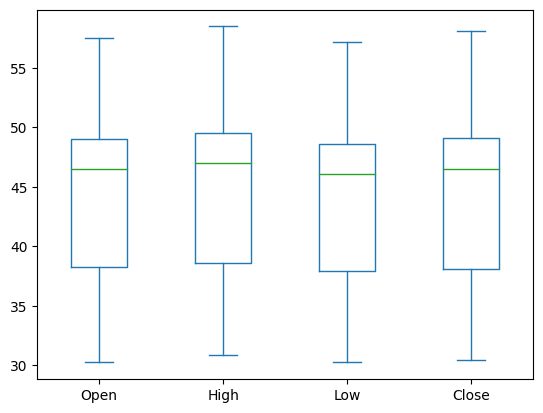

In [ ]:
fpt[['Open', 'High', 'Low', 'Close']].plot(kind ='box')

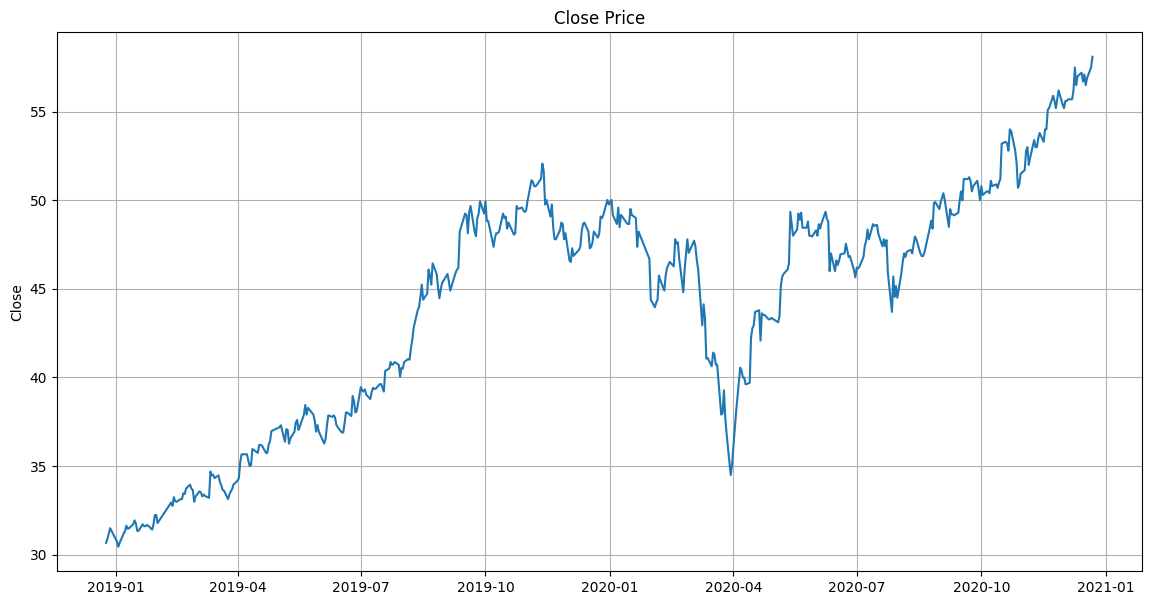

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(fpt['Close'])
plt.ylabel('Close')
plt.title("Close Price")
plt.grid()

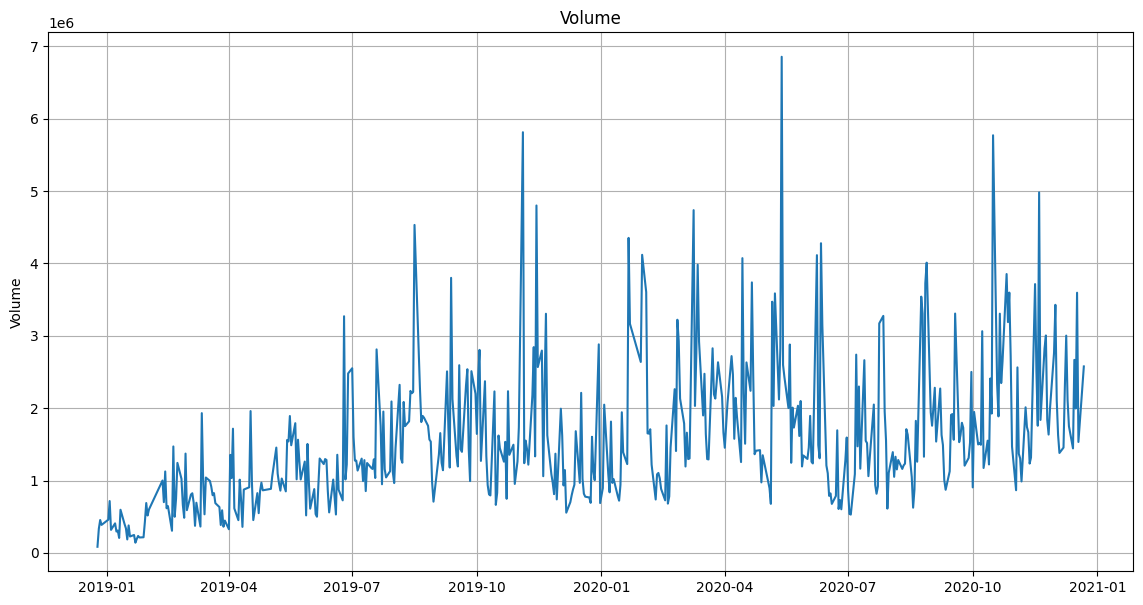

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(fpt['Volume'])
plt.ylabel('Volume')
plt.title("Volume")
plt.grid()

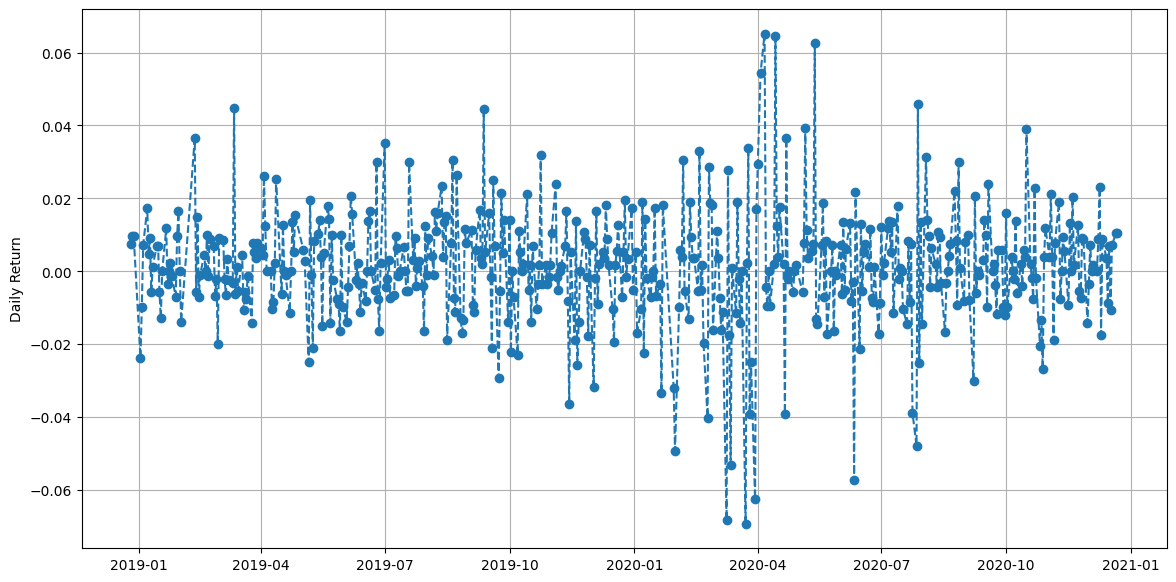

In [ ]:
fpt['Daily Return'] = fpt['Close'].pct_change()

plt.figure(figsize=(14, 7))
plt.plot(fpt['Daily Return'], linestyle='--', marker='o')
plt.ylabel('Daily Return')
plt.grid()


Text(0, 0.5, 'Counts')

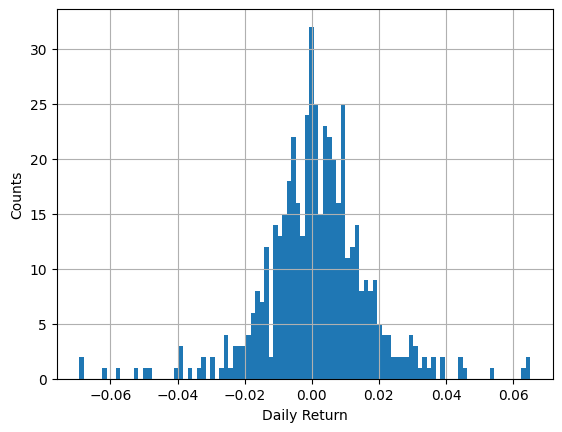

In [ ]:
fpt['Daily Return'].hist(bins=100)

plt.xlabel('Daily Return')
plt.ylabel('Counts')


In [ ]:
# Giá chênh lệch
fpt['PriceChange'] = fpt['Close'].shift(-1) - fpt['Close']

# Thêm các đặc trưng trung bình di động
fpt['MA10'] = fpt['Close'].rolling(window=10).mean()
fpt['MA50'] = fpt['Close'].rolling(window=50).mean()
fpt['MA100'] = fpt['Close'].rolling(window=100).mean()

# Loại bỏ các giá trị NaN
fpt.dropna(inplace=True)

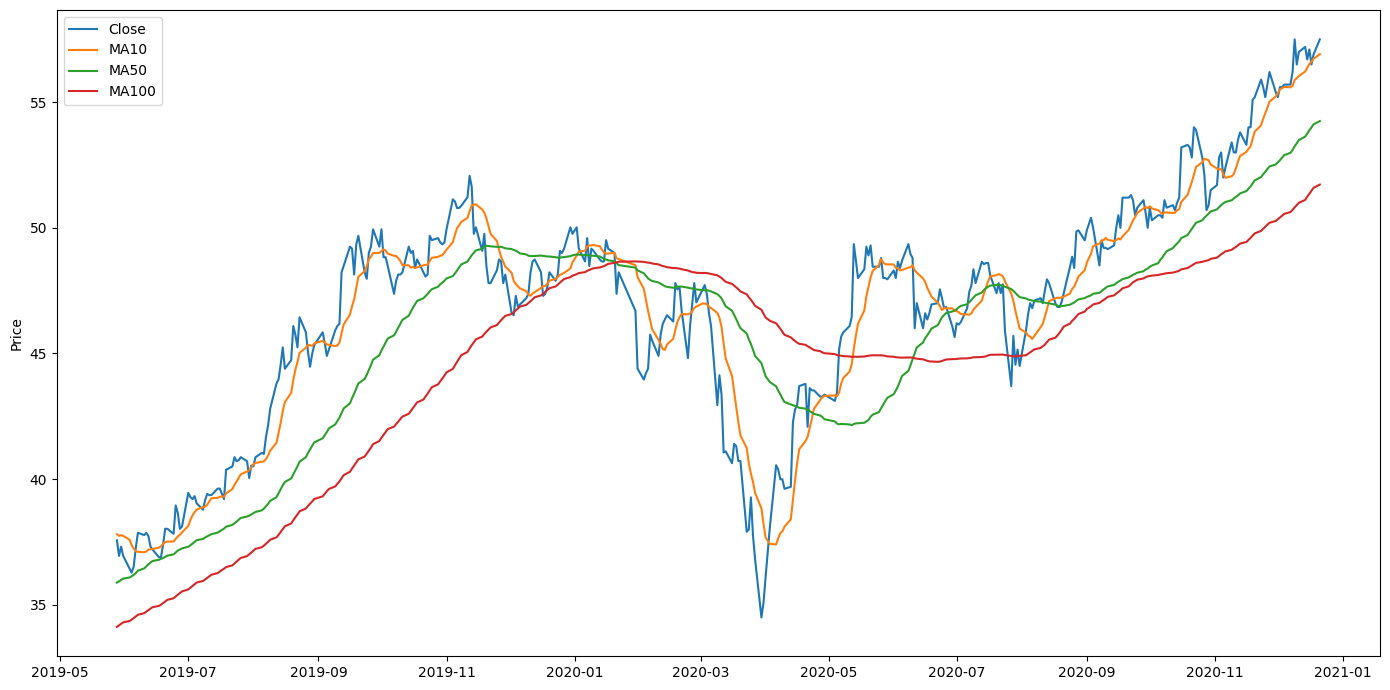

In [ ]:
plt.figure(figsize=(14, 7))
lines = plt.plot(fpt[['Close', 'MA10', 'MA50', 'MA100']], label=['Close', 'MA10', 'MA50', 'MA100'] )

plt.legend()
plt.ylabel('Price')
plt.tight_layout()
plt.show()

**RandomForest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Chọn các đặc trưng và target
predictors = ['Close', 'Open', 'High', 'Low', 'Volume']
X = fpt[predictors]
y = fpt['PriceChange']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Huấn luyện mô hình RandomForest
model = RandomForestRegressor(n_estimators=100, min_samples_split=10, random_state=1)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 0.6272138101515911
MAE: 0.5546396031494252


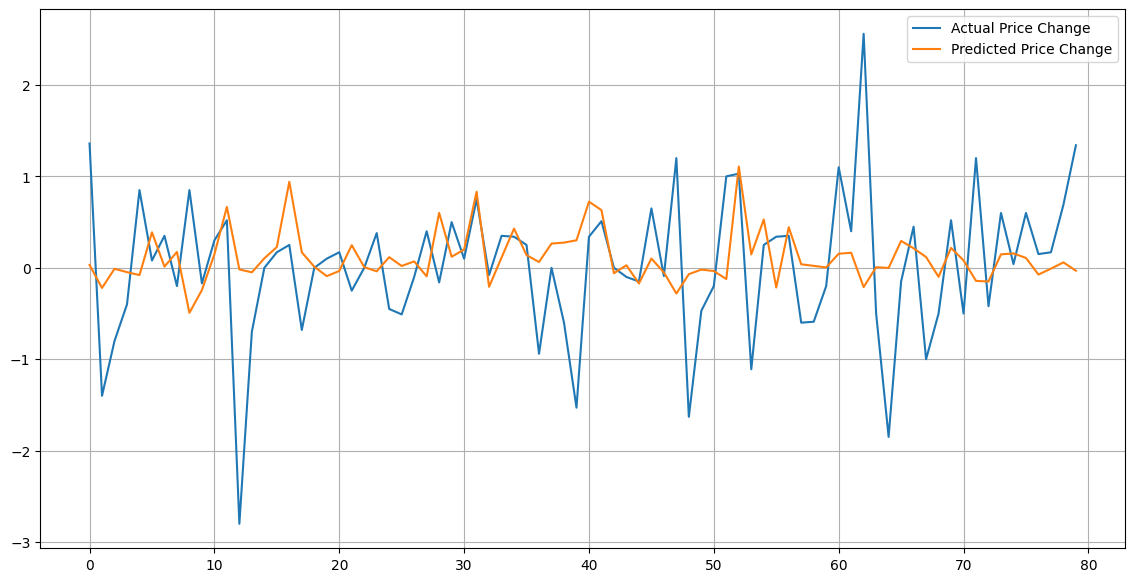

In [ ]:
# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Price Change')
plt.plot(y_pred, label='Predicted Price Change')
plt.legend()
plt.grid()
plt.show()

**LSTM**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Chọn các đặc trưng và target
predictors = ['Close', 'Open', 'High', 'Low', 'Volume']
X = fpt[predictors].values
y = fpt['PriceChange'].values

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Định dạng lại dữ liệu để phù hợp với yêu cầu của LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Xây dựng mô hình LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
10/10 [==============================] - 4s 6ms/step - loss: 0.6445
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6428
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6429
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6421
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6417
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6416
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6413
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6409
Epoch 9/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6406
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6403
Epoch 11/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6399
Epoch 12/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6406
Epoch 13/50
10/10 [==============================

3/3 [==============================] - 1s 4ms/step
LSTM MSE: 0.4661923042304744
LSTM MAE: 0.5407454145234077


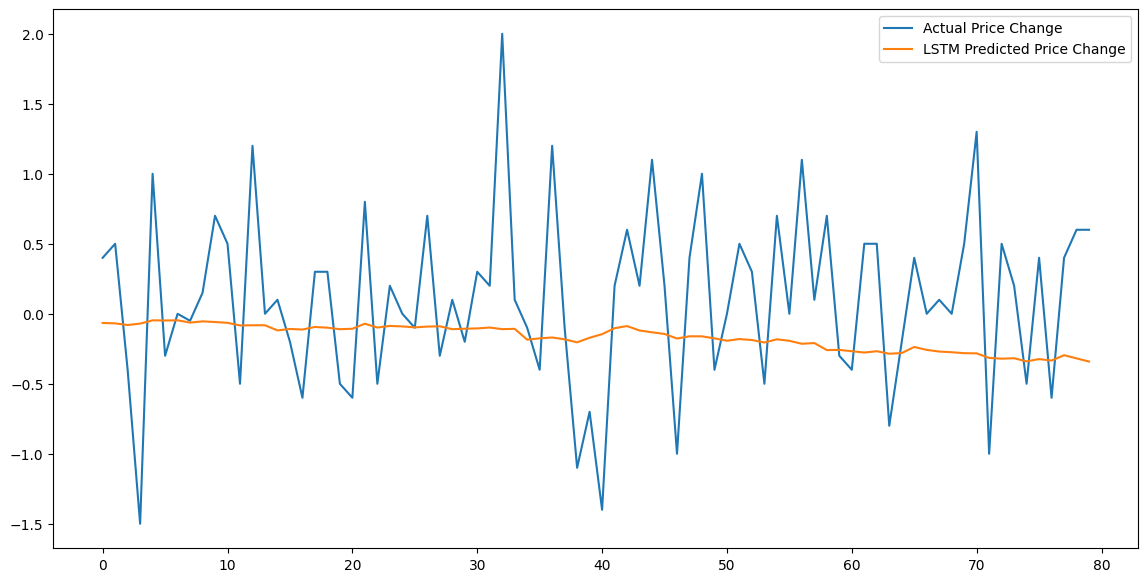

In [ ]:
# Dự đoán với mô hình LSTM
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm = y_pred_lstm.flatten()

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)

print(f'LSTM MSE: {mse_lstm}')
print(f'LSTM MAE: {mae_lstm}')

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán của LSTM
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Price Change')
plt.plot(y_pred_lstm, label='LSTM Predicted Price Change')
plt.legend()
plt.show()

**GradientBoostingRegressor, MLPRegressor, SVR, xgboost**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Chọn các đặc trưng và target
predictors = ['Close', 'Open', 'High', 'Low', 'Volume']
X = fpt[predictors]
y = fpt['PriceChange']

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'XGBoost':  XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    'SVR': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
    'MLP': MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, activation='relu', solver='adam')
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predicted_test = model.predict(X_test)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, predicted_test)

    results[model_name] = {
        'test_mse': mse_test,
        'predicted_test': predicted_test
    }

    # Print MSE results
    print(f"{model_name} Test MSE: {mse_test}")

XGBoost Test MSE: 0.7366857380095229
GradientBoosting Test MSE: 0.722527355419263
SVR Test MSE: 0.7171778129665018
MLP Test MSE: 0.7056684929829504


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


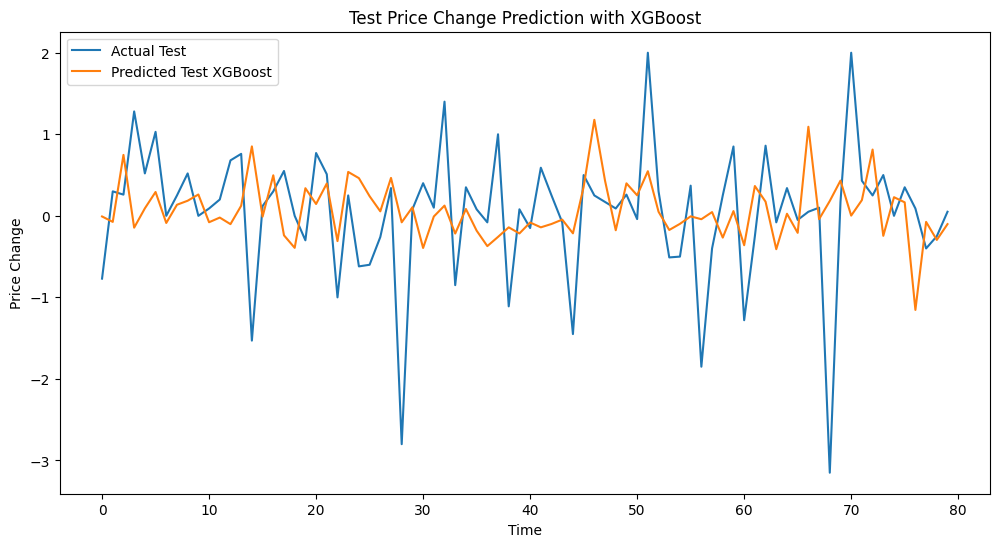

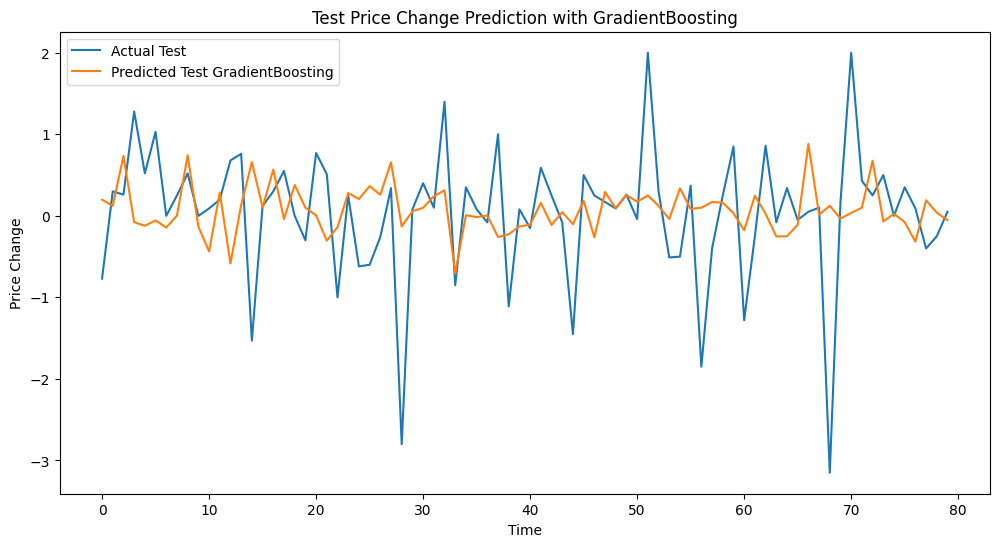

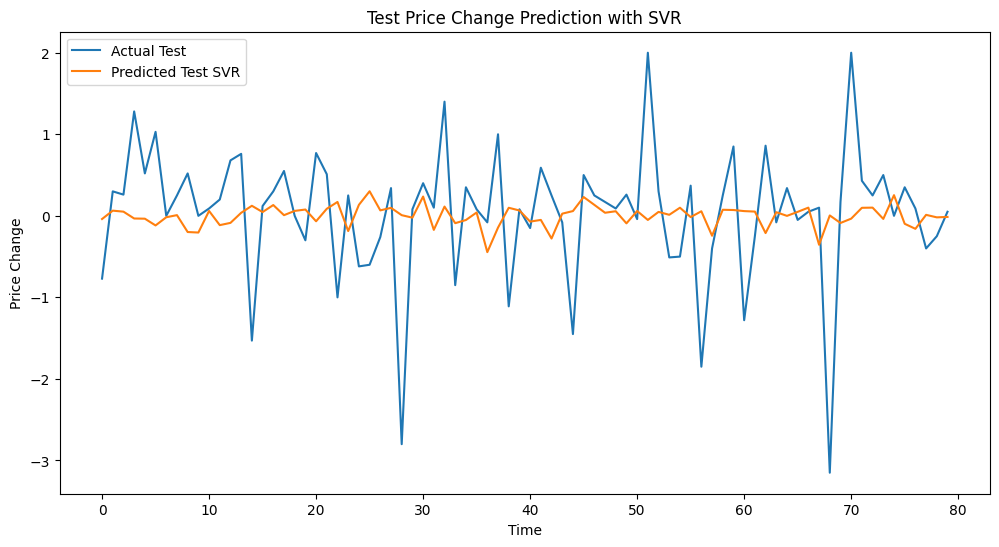

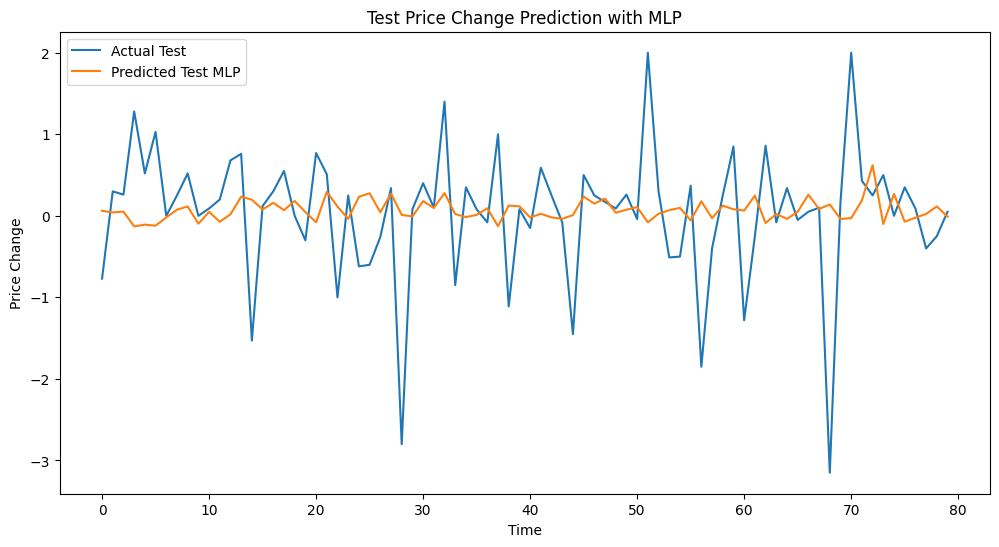

In [ ]:
# Plot results
for model_name, result in results.items():
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.reset_index(drop=True), label='Actual Test')
    plt.plot(result['predicted_test'], label=f'Predicted Test {model_name}')
    plt.title(f'Test Price Change Prediction with {model_name}')
    plt.xlabel('Time')
    plt.ylabel('Price Change')
    plt.legend()
    plt.show()

**Save model**

In [ ]:
import joblib
import os

# Lưu mô hình
model_path = os.path.join('/content/drive/MyDrive/Stock_analysis/model_trained', 'D_SVR_model.pkl')

# mse
joblib.dump(SVR, model_path)

# Load mô hình từ tệp
# loaded_model = joblib.load('SVR_model.pkl')